<a href="https://colab.research.google.com/github/Charles0823/ormi3/blob/main/python/%EC%98%A4%EB%A5%B4%EB%AF%B8_3%EA%B8%B0_Kcs_python_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#일급함수와 고차함수

In [ ]:
licat = print
licat('hello world')

hello world


In [ ]:
class Cat:
    def sound(self):
        print('냐옹')

licat = Cat()
licat_sound = licat.sound
licat_sound() # licat.sound()

냐옹


In [ ]:
l = [10, 20, 30]
la = l.append
la(40) # l.append
l

[10, 20, 30, 40]

In [ ]:
def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

funcs = [add, subtract]
print(funcs[0](2, 3))  # 출력: 5

5


In [ ]:
class Operator:
    def add(self, x, y):
        return x + y

    def sub(self, x, y):
        return x - y

    def mul(self, x, y):
        return x * y

    def div(self, x, y):
        return x / y

    def _and(self, x, y):
        pass

    def _or(self, x, y):
        pass

op = Operator()
logical_op = {
    'add': op.add,
    'sub': op.sub,
    'mul': op.mul,
    'div': op.div,
}
arithmetic_op = {
    '_and': op._and,
    '_or': op._or,
}

print(logical_op['add'](2, 3)) # 출력: 5
print(op.add(2, 3)) # 출력: 5

for _, f in logical_op.items():
    print(f(2, 3)) # 4칙연산 모두 계산

5
5
5
-1
6
0.6666666666666666


In [ ]:
# JavaScript
# l = [10, 20, 30]
# l.map((v)=>v**2) // [100, 400, 900]

In [ ]:
# 함수를 인자로 받았음!
def licat_sound(p):
    # 함수의 기능 10줄이 들어간다 생각하겠습니다.
    x = 10
    y = 10
    z = 10
    p('냐옹')

licat_sound(print) # licat_sound안에 built-in function인 print를 넣었습니다.

냐옹


In [ ]:
def square(x):
    return x ** 2

def width_circle(r, s):
    return s(r) * 3.14

width_circle(10, square)

314.0

In [ ]:
# 함수를 결과로 반환!
def create_adder(x):
    def adder(y):
        return x + y
    return adder

add_5 = create_adder(5)
print(add_5(10))  # 출력: 15

15


In [ ]:
def create_exponent(x):
    def exponent(y):
        return y ** x
    return exponent

exponent_2 = create_exponent(2)  # exponent
exponent_3 = create_exponent(3)  # exponent
print(exponent_2(10)) # 출력: 100
# print(exponent(10)) => return y ** 2(이 숫자는 상수 취급되어 변경시킬 수 없습니다.)
print(exponent_3(10)) # 출력: 1000
# print(exponent(10)) => return y ** 3(이 숫자는 상수 취급되어 변경시킬 수 없습니다.)

100
1000


In [ ]:
def f():
    l = [10, 20, 30]
    print(id(l))
    return l

sample = f()
id(sample) # 주소가 같네요??
# 함수가 끝나면 안에 변수들이 다 휘발되는 것 아니었나요??

135733850493184


135733850493184

In [ ]:
import sys

def ff():
    l = [10, 20, 30]
    return l

sample_ = ff()
sys.getrefcount(sample_) # window, mac, linux의 출력값이 달라요.
# 중요한 포인트는 getrefcount의 작동 원리가 아니라
# 함수가 종료되어도 참조하는 변수가 있다면
# 값이 사라지지 않는다는 것이 포인트입니다!

2

In [ ]:
import sys

def ff():
    l = [10, 20, 30]
    return l

sample_ = ff()

In [ ]:
sys.getrefcount(sample_)

3

In [ ]:
# 일급 함수: 함수를 읿급함수(값이나 주소)로 취급
# 고차 함수: 함수를 아규먼트로 받거나 return 값으로 반환할 수 있는 함수

#클로저

In [ ]:
# 클로저: 휘발되었어야 하는 메모리 영역에 접근하여 함수나 데이터를 활용하는 말   (실무에서는 거의 사용하지 않음)

In [ ]:
# 클로저가 아닌경우
def outer_function():
    def inner_function():
        return 100+100
    return inner_function

# 클로저인 경우
def outer_function(x):
    def inner_function(y):
        return x + y
    return inner_function

inner = outer_function(100)
inner(200) # inner 입장에서 100을 변경할 수 있는 방법이 없습니다.

300

#데코레이터

In [ ]:
# 이런 식으로 우린 사용합니다.
# login한 사용자만 게시판 읽도록
# 그러면 내가 login을 구현해야 하나?
# Django와 같은 프레임워크는 필요한 대부분의 데코레이터가 미리 구현되어 있습니다.
def login(arg):
    pass

@login
def 게시판읽기():
    pass

In [ ]:
def simple_decorator(function):
    def wrapper():
        print("Before the function call")
        function()
        print("After the function call")
    return wrapper

@simple_decorator
def hello():
    print("Hello, World!")

hello() # 데코레이터가 없는 상태에서는 simple_decorator(hello)() 와 같습니다.

Before the function call
Hello, World!
After the function call


In [ ]:
def simple_decorator(function):
    def wrapper():
        print("Before the function call")
        function()
        print("After the function call")
    return wrapper

def hello():
    print("Hello, World!")

simple_decorator(hello)()
# simple_decorator(hello) => wrapper
# simple_decorator(hello)() => wrapper()

Before the function call
Hello, World!
After the function call


In [ ]:
def simple_decorator(function):
    def wrapper():
        print("Before the function call")
        function()
        print("After the function call")
    return wrapper

@simple_decorator
def hello():
    print("Hello, World!")

hello() # 이렇게만 하면 simple_decorator에 hello를 아규먼트로 넣어주고 실행하겠다!

Before the function call
Hello, World!
After the function call


In [ ]:
# step 1
def data_Preprocessing(function):
    def wrapper():
        pass
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # TypeError 발생

In [ ]:
# step 2
def data_Preprocessing(function):
    def wrapper(data):
        print(data)
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # 데이터만 출력하고 함수는 None을 반환

[1, 2, '3', 4, '5']


In [ ]:
# step 3
def data_Preprocessing(function):
    def wrapper(data):
        return function(list(map(int, data)))
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # 출력: 3.0 (정상 작동) # 데코레이터가 붙으면 mean을 실행하는 것이 아닙니다!

# data_Preprocessing(mean) => wrapper
# data_Preprocessing(mean)([1, 2, '3', 4, '5']) => wrapper([1, 2, '3', 4, '5'])

3.0

In [ ]:
# step 3
def data_Preprocessing(function):
    def wrapper(a, b, c):
        print(a, b, c)
        # print(function([a, b, c]))
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean(10, 20, 30) # 왜 오류가 없을까요? data인자가 하나고, 10, 20, 30인자가 3개인데요?

10 20 30


In [ ]:
#### 여기까지 이해하시면 됩니다. ####

In [ ]:
import sys

def ff():
    l = [10, 20, 30]
    return l

sample_ = ff()
sys.getrefcount(sample_) # window, mac, linux의 출력값이 달라요.
# 중요한 포인트는 getrefcount의 작동 원리가 아니라
# 함수가 종료되어도 참조하는 변수가 있다면
# 값이 사라지지 않는다는 것이 포인트입니다!

2

In [ ]:
# 강성웅님 Q&A
# b를 실행시키고 싶은데 어떻게 해야 할까요?
def outer(function):
    def wrapper():
        return 'hello'
    return wrapper

@outer
def a():
    def b():
        print('hello b')
    return b

print(a())

hello


In [ ]:
# 강성웅님 Q&A
# b를 실행시키고 싶은데 어떻게 해야 할까요?
def outer(function):
    def wrapper():
        function()
        return 'hello'
    return wrapper

@outer
def a():
    def b():
        print('hello b')
    return b

print(a())

hello


In [ ]:
# 강성웅님 Q&A
# b를 실행시키고 싶은데 어떻게 해야 할까요?
def outer(function):
    def wrapper():
        function()
        return 'hello'
    return wrapper

@outer
def a():
    def b():
        print('hello b')
    return b

print(a())

hello


In [ ]:
# 강성웅님 Q&A
# b를 실행시키고 싶은데 어떻게 해야 할까요?
def outer(function):
    def wrapper():
        function()()
        return 'hello'
    return wrapper

@outer
def a():
    def b():
        print('hello b')
    return b

print(a())

hello b
hello


In [ ]:
# 평생 볼 가능성 거의 없음!!

def add_exclamation(function):
    def wrapper(text):
        print(f'add_exclamation 데코레이터 시작')
        result = function(text) + "!"
        print(f'add_exclamation 데코레이터 종료')
        return result
    return wrapper

def add_question_mark(function):
    def wrapper(text):
        print(f'add_question_mark 데코레이터 시작')
        result = function(text) + "?"
        print(f'add_question_mark 데코레이터 종료')
        return result
    return wrapper

def add_dot(function):
    def wrapper(text):
        print(f'add_dot 데코레이터 시작')
        result = function(text) + "."
        print(f'add_dot 데코레이터 종료')
        return result
    return wrapper

In [ ]:
# 많이 볼 가능성이 낮습니다.

def add(n): # 데코레이터를 감싸는 하나의 함수를 더 만들어서 아규먼트를 받는 방법입니다.
    def decorator(function): # 여기서부터의 기능은 같습니다.
        def new_function(a, b):
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 시작됩니다.')
            result = function(a, b)
            print(result)
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 종료됩니다.')
            return result + n
        return new_function
    return decorator

@add(1000)
def plus(a, b):
    print('plus 함수가 호출되었습니다.')
    return a + b

result = plus(10, 20)
print(f'result : {result}')

plus 함수가 1000만큼 증가시키는 데코레이터가 시작됩니다.
plus 함수가 호출되었습니다.
30
plus 함수가 1000만큼 증가시키는 데코레이터가 종료됩니다.
result : 1030


#연습문제

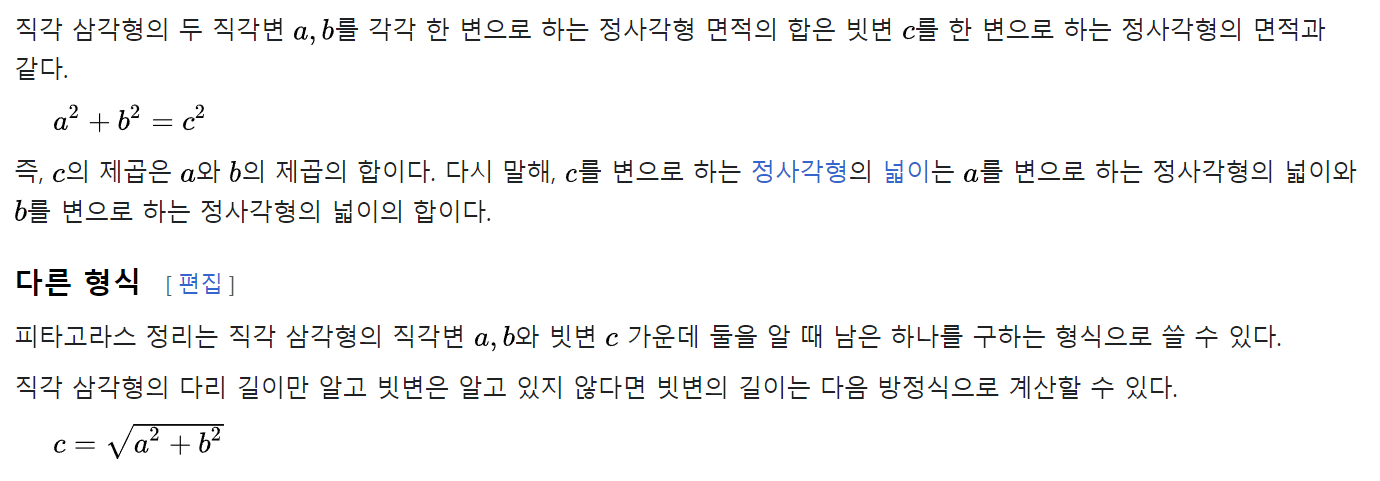

In [ ]:
def find_hypotenuse(a, b, s, r):
    return r(s(a) + s(b))

def square(value):
    return value ** 2

def root(value):
    return value ** 0.5

find_hypotenuse(6, 8, square, root)

10.0

#lambda

In [ ]:
# 재사용되지 않는 함수

In [ ]:
square = lambda x: x*x
print(square(5))  # 출력: 25

25


In [ ]:
# 재사용되는 코드
def 제곱(x):
    return x ** 2

list(map(제곱, [1, 2, 3])) + list(map(제곱, [4, 5, 6]))

[1, 4, 9, 16, 25, 36]

In [ ]:
# 재사용되지 않는 코드

list(map(lambda x:x**2, [1, 2, 3]))

[1, 4, 9]

#args, kwargs

In [ ]:
a, b, *c = 10, 20, 30, 40, 50, 60
c

[30, 40, 50, 60]

In [ ]:
def print_args(a, b, *args):
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 10)

('Licat', 'hello', 10)
Licat
hello
10


In [ ]:
def print_args(a, b, *args, c): # *args뒤에 일반 변수를 선언하지 못합니다.
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 10)

TypeError: ignored

In [ ]:
def print_args(a, b, *args, *c): # *args뒤에 또다른 가변 아규먼트를 넣지 못합니다.
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 10)

SyntaxError: ignored

In [ ]:
def print_kwargs(a, **kwargs):
    print(a)
    print(kwargs)
    for i in kwargs:
        print(i)

print_kwargs(100, name='Licat', age='10')

100
{'name': 'Licat', 'age': '10'}
name
age


In [ ]:
# 눈속임입니다.
# *kwargs 이렇게 사용하시면 관습에 어긋납니다.
def print_kwargs(*kwargs):
    print(kwargs)
    for i in kwargs:
        print(i)

value = {'one':10, 'two':20}
print_kwargs(*value)

('one', 'two')
one
two


In [ ]:
def print_kwargs(*args):
    print(args)
    for i in args:
        print(i)

value = {'one':10, 'two':20}
print_kwargs(*value)

('one', 'two')
one
two


In [ ]:
def print_kwargs(**kwargs):
    print(kwargs)
    for i in kwargs:
        print(i)

value = {'one':10, 'two':20}
print_kwargs(**value)

{'one': 10, 'two': 20}
one
two


In [ ]:
def func(a, b, *, c, d):
    print(a, b, c, d)

func(1, 2, c = 3, d = 4)  # 올바른 예시
# func(1, 2, 3, d = 4)  # 잘못된 예시
# func(1, 2, 3, 4)    # 잘못된 예시

1 2 3 4


In [ ]:
def func(a, b, c):
    print(a, b, c)

args = (1, 2, 3)
func(*args)
print(args, *args)

kwargs = {'a': 1, 'b': 2, 'c': 3}
func(**kwargs)
print(kwargs, **kwargs) # error

In [ ]:
kwargs = {'a': 1, 'b': 2, 'c': 3}
print(kwargs, *kwargs)
# print(kwargs, **kwargs) # 왜 에스터리스크가 2개일 때 error가 날까요?
# print(kwargs, a=1, b=2, c=3) # 이 코드가 바로 위의 코드와 같습니다.

{'a': 1, 'b': 2, 'c': 3} a b c


In [ ]:
def func(d=100, c=200, b=300, a=400):
    print(d, c, b, a)

kwargs = {'a': 1, 'b': 2, 'c': 3}
func(**kwargs)
# func(kwargs, a=1, b=2, c=3) 로 입력이 되었다는 것을 확인할 수 있습니다.
# {'a': 1, 'b': 2, 'c': 3} => **kwargs => a=1, b=2, c=3

100 3 2 1


In [ ]:
# a=1, b=2, c=3 => **kwargs => {'a': 1, 'b': 2, 'c': 3}
def func(a=100, **kargs):
    print(a, kargs)

func(1000, i=1, j=2, k=3)

1000 {'i': 1, 'j': 2, 'k': 3}


In [ ]:
def func(*args):
    print(args)

func(10, 20, 30)
# func(kwargs, a=1, b=2, c=3) 로 입력이 되었다는 것을 확인할 수 있습니다.
# 10, 20, 30 => *args => (10, 20, 30)

(10, 20, 30)


In [ ]:
def func(a, b, c):
    print(a, b, c)

args = (10, 20, 30)
func(*args)
# func(kwargs, a=1, b=2, c=3) 로 입력이 되었다는 것을 확인할 수 있습니다.
# (10, 20, 30) => *args => 10, 20, 30

10 20 30


In [ ]:
a, b, c = range(3)
a

0

In [ ]:
a, b, c = range(10, 31, 10)
a

10

In [ ]:
# *args는 리스트를 묶고 풀고하는 용도로 사용하고
# **kargs는 딕셔너리를 묶고 풀고하는 용도로 사용한다고 간단하게 생각해도 괜찮을까요?

SyntaxError: ignored

#이터레이터

In [ ]:
class MyIterator:
    def __init__(self, stop):
        self.current_value = 0  # 현재 값
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

# '''
# for를 만나면 __iter__가 실행이 되고, 반복이 시작되면 __next__를 호출합니다.
# '''

0
1
2
3
4


In [ ]:
class MyIterator:
    def __init__(self, stop):
        self.current_value = 0  # 현재 값
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

for i in my_iterator:
    print(i)

0
1
2
3
4


In [ ]:
class MyIterator:
    def __init__(self, stop):
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        self.current_value = 0  # 현재 값
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

for i in my_iterator:
    print(i)

0
1
2
3
4
0
1
2
3
4


In [ ]:
class MyIterator:
    def __init__(self, stop):
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        self.current_value = 0  # 현재 값
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)
i = iter(my_iterator) # 여기서부터
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))
# print(next(i)) #error  # 여기까지가 for에 작동 원리 입니다.

0
1
2
3
4


In [ ]:
class MyIterator:
    def __init__(self, stop):
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        self.current_value = 0  # 현재 값
        return self    # [10, 20, 30] 넣으면 error

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

0
1
2
3
4


#제너레이터

In [ ]:
def my_generator(data):
    for i in data:
        yield i

my_list = [1, 2, 3, 4, 5]
my_iterator = my_generator(my_list)

for i in my_iterator: # my_iterator는 함수의 return값이어야 하는데?
    print(i)

1
2
3
4
5


In [ ]:
# 이것이 좀 더 이해하기 좋으실겁니다.

def my_generator(data):
    for i in data:
        yield i * 10

for i in my_generator([1, 2, 3]):
    print(i)

10
20
30


In [ ]:
# 이것이 좀 더 이해하기 좋으실겁니다.

def my_generator():
    x = 10
    yield x
    x = 20
    yield x
    x = 30
    yield x
    return
    x = 40
    yield x

for i in my_generator():
    print(i)

10
20
30


In [ ]:
# 이럴때 많이 사용합니다.
def my_generator():
    l = ['짝', '홀']
    t = False
    while True:
        yield l[t]
        t = True
        yield l[t]
        t = False

list(zip([0, 1, 2, 3, 4, 5, 6], my_generator()))

[(0, '짝'), (1, '홀'), (2, '짝'), (3, '홀'), (4, '짝'), (5, '홀'), (6, '짝')]

In [ ]:
# 이럴때 많이 사용합니다.
def my_generator():
    l = ['짝', '홀']
    while True:
        yield l[t := False]
        yield l[t := True]

list(zip([0, 1, 2, 3, 4, 5, 6], my_generator()))

[(0, '짝'), (1, '홀'), (2, '짝'), (3, '홀'), (4, '짝'), (5, '홀'), (6, '짝')]

In [ ]:
def my_generator():
    count = 1
    while True:
        yield count
        count += 1
list(zip(['A', 'B', 'C'], my_generator())) # 마치 enumerate처럼

[('A', 1), ('B', 2), ('C', 3)]

In [ ]:
def my_generator():
    count = 0
    while True:
        yield count
        count += 2  # 2로 변경됨
list(zip(['A', 'B', 'C'], my_generator())) # 마치 enumerate처럼

[('A', 0), ('B', 2), ('C', 4)]

In [ ]:
def my_generator():
    count = 0
    while True:
        yield count
        count += 2
list(zip([1, 2, 3, 4, 5, 6, 7, 8, 9], 'hello world', my_generator())) # 마치 enumerate처럼

[(1, 'h', 0),
 (2, 'e', 2),
 (3, 'l', 4),
 (4, 'l', 6),
 (5, 'o', 8),
 (6, ' ', 10),
 (7, 'w', 12),
 (8, 'o', 14),
 (9, 'r', 16)]

In [ ]:
def my_generator():
    count = 0
    while True:
        yield count
        count += 2
print(list(zip(['A', 'B', 'C'], my_generator())))
print(list(zip(['A', 'B', 'C'], my_generator())))

[('A', 0), ('B', 2), ('C', 4)]
[('A', 0), ('B', 2), ('C', 4)]


In [ ]:
gen = (i for i in range(2, 11, 2))
for i in gen:
    print(i)

2
4
6
8
10


#연습문제

In [ ]:
# 회전초밥집에 들어갔습니다. 초밥은 아래와 같은 양식으로 나옵니다.
# [['광어초밥', 1000], ['연어초밥', 2000], ['계란초밥', 3000]]
# * 각 초밥은 몇 개 나올지 알 수 없습니다.
# * 각 초밥은 1000원씩 비싸집니다.
# * 초밥에 '어'가 나오는 초밥만 먹습니다.
# 내가 먹은 초밥의 비용을 계산하는 코드를 작성해 주세요.

def solution(data):
    total = 0

    for sushi, cost in data:
        if '어' in sushi:
            total += cost

    return total

sushi_cost = [['광어초밥', 1000], ['연어초밥', 2000], ['계란초밥', 3000], ['문어초밥', 4000], ['장어초밥', 5000]]
total = solution(sushi_cost)
print(f'먹은 초밥의 비용: {total}')

먹은 초밥의 비용: 12000


In [ ]:
#강사님 풀이

def gen(data):
    for name, price in data:
        if '어' in name:
            yield price

def solution(data):
    return sum(gen(data))

solution([['광어초밥', 1000], ['연어초밥', 2000], ['계란초밥', 3000], ['문어초밥', 4000], ['장어초밥', 5000]])

12000

# nonlocal

In [ ]:
x = 100
def outer():
    x = 1
    def inner():
        nonlocal x
        x += 1
        print(x) # 출력: 2
    inner()
    print(x) # 출력: 2

outer()
print(x) # 출력: 100

2
2
100


In [ ]:
x = 100
def outer():
    x = 1
    def inner():
        global x
        x += 1
        print(x) # 출력: 101
    inner()
    print(x) # 출력: 1

outer()
print(x) # 출력: 101

101
1
101


In [ ]:
x = 100
def outer():
    x = 1
    def inner():
        # x += 1 # error
        print(x) # 출력: 2
    inner()
    print(x) # 출력: 2

outer()
print(x) # 출력: 100

1
1
100


#zip이 사라지는 이유

In [ ]:
a = [1, 2, 3]
b = ['a', 'b', 'c']

z = zip(a, b)
print(list(z)) # [(1, 'a'), (2, 'b'), (3, 'c')]

# zip 객체는 한 번 사용되었으므로 빈 리스트가 반환됩니다.
print(list(z)) # []

[(1, 'a'), (2, 'b'), (3, 'c')]
[]


In [ ]:
x = [1, 2, 3]
y = sorted(x)

for i in y:
    print(i)

for i in y:
    print(i)

y # 심지어 리스트로 나옵니다!? zip, map 너무 차별하는 것 아닐까요?

1
2
3
1
2
3


[1, 2, 3]

#연습문제

In [ ]:
# value swap
# pre, next = next, temp
# 다른언어
temp = a
a = b
b = temp
# 파이썬
a, b = b, a

In [ ]:
# 문제1
# 다음과 같이 동작하는 제너레이터 함수 fibonacci(n)를 완성하세요.
# 주어진 숫자 n까지의 피보나치 수열을 반환합니다.
# 인터넷에서 피보나치 순열 Python 코드를 검색해보셔도 좋습니다.

def fib(n):
    pass

for i in fib(5):
    print(i)

# '''
# 출력
# 1
# 1
# 2
# 3
# 5
# '''

# 문제2
# 주어진 함수의 실행 시간을 측정하여 출력하는 데코레이터 time_it를 작성하세요.
# (힌트: time 모듈의 time() 함수를 사용하세요.)

In [ ]:
# 문제1
# 다음과 같이 동작하는 제너레이터 함수 fibonacci(n)를 완성하세요.
# 주어진 숫자 n까지의 피보나치 수열을 반환합니다.
# 인터넷에서 피보나치 순열 Python 코드를 검색해보셔도 좋습니다.

def fibo(n):
    a, b = 0, 1
    for i in range(n):
        yield a
        a, b = b, a + b

for j in fibo(5):
    print(j)

0
1
1
2
3


In [ ]:
# 강사님 풀이

def fib(n):
    pre = 1
    next = 1
    count = 0
    while True:
        temp = pre + next
        yield pre
        pre, next = next, temp
        count += 1
        if count == n:
            break

for i in fib(5):
    print(i)

1
1
2
3
5


In [ ]:
# 문제2
# 주어진 함수의 실행 시간을 측정하여 출력하는 데코레이터 time_it를 작성하세요.
# (힌트: time 모듈의 time() 함수를 사용하세요.)
import time

def time_it(function):
    def wrapper(*args):
        start = time.time()
        result=function(*args)
        end = time.time()
        print(f'시간: {end - start: .4f} 초')
        return result
    return wrapper

def fibo(n):
    a, b = 1, 1
    for i in range(n):
        yield a
        a, b = b, a + b

@time_it
def result(n):
    for j in fibo(5):
        print(j)

result(5)

1
1
2
3
5
시간:  0.0002 초


In [ ]:
# 강사님 풀이

import time

def time_it(func):
    def wrapper():
        start_time = time.time()
        func()
        end_time = time.time()
        print(f"{end_time - start_time:.4f}s")
    return wrapper

@time_it
def main():
    def fib(n):
        pre = 1
        next = 1
        count = 0
        while True:
            temp = pre + next
            yield pre
            pre, next = next, temp
            count += 1
            if count == n:
                break

    for i in fib(5):
        print(i)

main()

1
1
2
3
5
0.0123s


#파이썬 버전별 문법

In [ ]:
def fetch_smalltable_rows(
    table_handle: smalltable.Table,
    keys: Sequence[bytes | str],
    require_all_keys: bool = False,
) -> Mapping[bytes, tuple[str, ...]]:
    """Fetches rows from a Smalltable.

    Retrieves rows pertaining to the given keys from the Table instance
    represented by table_handle.  String keys will be UTF-8 encoded.

    Args:
        table_handle: An open smalltable.Table instance.
        keys: A sequence of strings representing the key of each table
          row to fetch.  String keys will be UTF-8 encoded.
        require_all_keys: If True only rows with values set for all keys will be
          returned.

    Returns:
        A dict mapping keys to the corresponding table row data
        fetched. Each row is represented as a tuple of strings. For
        example:

        {b'Serak': ('Rigel VII', 'Preparer'),
         b'Zim': ('Irk', 'Invader'),
         b'Lrrr': ('Omicron Persei 8', 'Emperor')}

        Returned keys are always bytes.  If a key from the keys argument is
        missing from the dictionary, then that row was not found in the
        table (and require_all_keys must have been False).

    Raises:
        IOError: An error occurred accessing the smalltable.
    """

In [4]:
# 3.6 버전
def greet(name: str) -> str:
    return f'Hello, {name}'

greet(10)

'Hello, 10'

In [6]:
# 3.6 버전
def greet(name):
    '''
    인사를 하는 함수입니다.

    이 함수는 name 인자로 받아 name과 함께 인사를 하는 함수입니다~~

    Args:
        a(str): 블라블라
        b(int): 블라블라

    Returns:
        리턴은 이런식입니다.
        example: [1, 2, 3]

    Raises:
        IOError: 애러 블라블라
    '''
    return f'Hello, {name}'

greet(10)

'Hello, 10'

In [7]:
greet.__doc__

'\n    인사를 하는 함수입니다.\n\n    이 함수는 name 인자로 받아 name과 함께 인사를 하는 함수입니다~~\n\n    Args:\n        a(str): 블라블라\n        b(int): 블라블라\n\n    Returns:\n        리턴은 이런식입니다.\n        example: [1, 2, 3]\n\n    Raises:\n        IOError: 애러 블라블라\n    '

In [8]:
# 3.6 버전
# 이 함수는 블라블라
def greet(name):
    return f'Hello, {name}'

greet(10)
greet.__doc__

In [9]:
# 3.6 버전
name = 'Alice'
print(f'Hello, {name}')

Hello, Alice


In [10]:
# 3.7 버전
from dataclasses import dataclass

@dataclass
class User:
    id: int
    name: str
    email : str

user = User(123, 'hojun', 'hojun@gmail')
user

User(id=123, name='hojun', email='hojun@gmail')

In [11]:
# 3.8
(x := 10) * 3

30

In [13]:
x

10

In [14]:
# 3.9
# 딕셔너리 결합 이제 됩니다!
x = {"key1": "value1"}
y = {"key2": "value2"}
z = x | y
z

{'key1': 'value1', 'key2': 'value2'}

In [19]:
# {"key1": "value1"} + {"key2": "value2"}          #error
# {"key1": "value1"}.append({"key2": "value2"})    #error
x = {"key1": "value1"}
x.update({"key2": "value2"})
x

{'key1': 'value1', 'key2': 'value2'}

In [16]:
# 3.5
x = {"key1": "value1"}
y = {"key2": "value2"}
z = {**x, **y}
z

{'key1': 'value1', 'key2': 'value2'}

In [17]:
!python --version

Python 3.10.12


In [18]:
# 3.10
str_test = "good"

match str_test:
    case "happy":
        print("happy")

    case "good":
        print("good")

good


# 파일 입출력

In [ ]:
# open(파일이름, 파일모드)
f = open('python.txt', 'w')
# 파일모드 :
# r(읽기모드)
# w(쓰기모드, 파일이 없으면 생성합니다, 내용이 있어도 w모드면 덮어씁니다.)
# a(추가모드)
f.close()

In [ ]:
f = open('python.txt', 'w')
s = ''
for i in range(1, 6):
    s += f'{i}명 참여 중입니다. \n'
f.write(s)
f.close()   # 오픈을 했으면 반드시 close를 할 것.

In [20]:
f = open('python.txt', 'w')
s = ''
for i in range(1, 6):
    s += f'{i}명 참여 중입니다. \n'
f.write(s)
f.close()

In [59]:
f = open('python.txt', 'r')
while True:
    line = f.readline()
    if not line:
        break
    print(line)
f.close()

1명 참여 중입니다. 

2명 참여 중입니다. 

3명 참여 중입니다. 

4명 참여 중입니다. 

5명 참여 중입니다. 



In [60]:
f = open('python.txt', 'r')
lines = f.readlines()
for line in lines:
    print(line)
f.close()

1명 참여 중입니다. 

2명 참여 중입니다. 

3명 참여 중입니다. 

4명 참여 중입니다. 

5명 참여 중입니다. 



In [22]:
f = open('python.txt', 'r')
lines = f.readlines()
# for line in lines:
#     print(line)
print(lines)
f.close()

['1명 참여 중입니다. \n', '2명 참여 중입니다. \n', '3명 참여 중입니다. \n', '4명 참여 중입니다. \n', '5명 참여 중입니다. \n']


In [23]:
f = open('python.txt', 'r')
data = f.read()
print(data)
f.close()

1명 참여 중입니다. 
2명 참여 중입니다. 
3명 참여 중입니다. 
4명 참여 중입니다. 
5명 참여 중입니다. 



In [25]:
data

'1명 참여 중입니다. \n2명 참여 중입니다. \n3명 참여 중입니다. \n4명 참여 중입니다. \n5명 참여 중입니다. \n'

In [26]:
f = open('python.txt', 'r')
lines = f.readlines()
for line in lines:
	print(line, end='')
f.close()

1명 참여 중입니다. 
2명 참여 중입니다. 
3명 참여 중입니다. 
4명 참여 중입니다. 
5명 참여 중입니다. 


In [ ]:
# 쉬운 예제
f = open('python.txt', 'w')
s = '''<html>
<head>
</head>
<body>
<h1>hello world</h1>
</body>
</html>
'''
f.write(s)
f.close

<function TextIOWrapper.close()>

In [27]:
# 쉬운예제
f = open('python.csv', 'w')
s = '''제목,평점,이미지,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
'''
f.write(s)
f.close()

In [28]:
# 쉬운예제
f = open('student.csv', 'w')
s = '''학년,반,번,이름
1,3,1,licat
1,3,2,mura
1,3,3,binky
'''
f.write(s)
f.close()

In [29]:
# 쉬운예제
# colab에선 잘 열리지만, 대신 window 엑셀에서 깨집니다.
f = open('python.csv', 'w', encoding='utf-8')
s = '''제목,평점,이미지,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
'''
f.write(s)
f.close()

In [30]:
# 쉬운예제
# window 엑셀에서는 잘열리지만, 대신 colab에서 깨집니다.
f = open('python.csv', 'w', encoding='cp949') # window인코딩입니다.
s = '''제목,평점,이미지,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
'''
f.write(s)
f.close()

In [31]:
# 어려운 예제
# django의 동작원리와도 관련이 있습니다.
import requests
from bs4 import BeautifulSoup

paullab_url = 'http://paullab.co.kr/bookservice/'
response = requests.get(paullab_url)
response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

bookservices = soup.select('.col-lg-6 > h2')     # col-lg-6 클래스 안의 h2 태그 탐색
contents = ''

for no, (book, img) in enumerate(zip(bookservices, soup.select('img')[2:]), 1):
    contents += f'''
                <section>
                <h2>{no}. {book.text}</h2>
                <img src='https://paullab.co.kr/bookservice/{img["src"]}'>
                </section>
                '''

# 이미지 양식: https://paullab.co.kr/bookservice/img/notion.jpg
f = open('python.html', 'w')
s = f'''<html>
<head>
</head>
<body>
{contents}
</body>
</html>
'''
f.write(s)
f.close()

In [32]:
f = open('student.txt', 'w')
l = ['licat', 'mura', 'binky']
s = ''
for i, j in enumerate(l, 1):
    s += f'{i}번 {j}입니다.\n'
f.write(s)
f.close()

In [33]:
f = open('student.txt', 'r')
while True:
    line = f.readline()
    if not line:
        break
    print(line)
f.close()

1번 licat입니다.

2번 mura입니다.

3번 binky입니다.



In [34]:
f = open('student.txt', 'r')
lines = f.readlines()
for line in lines:
    print(line)
f.close()

1번 licat입니다.

2번 mura입니다.

3번 binky입니다.



In [35]:
f = open('student.txt', 'a')
s = 'hello world!'
f.write(s)
f.close()

In [50]:
f = open('student.txt', 'r')
lines = f.readlines()
for line in lines:
    print(line, end='')
f.close()

1번 licat입니다.
2번 mura입니다.
3번 binky입니다.
hello world!

In [ ]:
f = open('python.txt', 'r')
lines = f.readlines()
for line in lines:
    print(line, end='')
f.close()

6명 참여 중입니다. 
7명 참여 중입니다. 
8명 참여 중입니다. 
9명 참여 중입니다. 
10명 참여 중입니다. 
6명 참여 중입니다. 
7명 참여 중입니다. 
8명 참여 중입니다. 
9명 참여 중입니다. 
10명 참여 중입니다. 


In [37]:
# 어려운 예제
# django의 동작원리와도 관련이 있습니다.
import requests
from bs4 import BeautifulSoup

paullab_url = 'http://paullab.co.kr/bookservice/'
response = requests.get(paullab_url)
response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

bookservices = soup.select('.col-lg-6 > h2')     # col-lg-6 클래스 안의 h2 태그 탐색
contents = ''

for no, (book, img) in enumerate(zip(bookservices, soup.select('img')[2:]), 1):
    contents += f'''
                <section>
                <h2>{no}. {book.text}</h2>
                <img src='https://paullab.co.kr/bookservice/{img["src"]}'>
                </section>
                '''

# 이미지 양식: https://paullab.co.kr/bookservice/img/notion.jpg
f = open('python.html', 'w')
s = f'''<html>
<head>
</head>
<body>
{contents}
</body>
</html>
'''
f.write(s)
f.close()

In [ ]:
for i in soup.select('img')[2:]:
    print(i['src'])

img/notion.jpg
img/cofe.jpg
img/HTMLCSS.jpg
img/python1.jpg
img/python2.jpg
img/python3.jpg
img/tanos.jpg
img/xlsx.jpg
img/ruple.jpg
img/auto.jpg
img/django.jpg


In [63]:
f = open('python.txt', 'a')
s = ''
for i in range(6, 11):
    s += f'{i}명 참여 중입니다. \n'
f.write(s)
f.close()

In [38]:
with open('test.txt', 'w') as f:
    f.write('Life is too short, you need python')

In [39]:
## 파일 입출력은 이 위까지만 공부하시면 됩니다. ##
## 파일 입출력은 이 위까지만 공부하시면 됩니다. ##
## 파일 입출력은 이 위까지만 공부하시면 됩니다. ##

In [42]:
## 파일 입출력은 이 위까지만 공부하시면 됩니다. ##
## 파일 입출력은 이 위까지만 공부하시면 됩니다. ##

In [43]:
with open('test.txt', 'w') as f:
    f.write('hello world')

In [44]:
with open('test.txt', 'w') as f:
    f.write('hello world')

f = open('test.txt', 'r+') # 읽기 쓰기(기존에 있던 내용을 읽을 수 있고, 최종적으로는 덮어씀)
# f.seek(0)  # 파일의 시작 위치로 이동, r모드는 이렇게 하지 않아도 포인터가 맨 앞으로 가 있습니다.
print(f.read())
f.write('\nr+모드입니다!\n')
print('-----')
# f.seek(0)  # 파일의 시작 위치로 이동, 주석처리 해보세요.
print(f.read())
f.close()

hello world
-----



In [45]:
f = open('python.txt', 'r+') # 읽기 쓰기(기존에 있던 내용을 읽을 수 있고, 최종적으로는 덮어씀)
# f.seek(0)  # 파일의 시작 위치로 이동, r모드는 이렇게 하지 않아도 포인터가 맨 앞으로 가 있습니다.
print(f.read())
f.write('\nr+모드입니다!\n')
print('-----')
f.seek(0)  # 파일의 시작 위치로 이동, 주석처리 해보세요.
print(f.read())
f.close()

1명 참여 중입니다. 
2명 참여 중입니다. 
3명 참여 중입니다. 
4명 참여 중입니다. 
5명 참여 중입니다. 

-----
1명 참여 중입니다. 
2명 참여 중입니다. 
3명 참여 중입니다. 
4명 참여 중입니다. 
5명 참여 중입니다. 

r+모드입니다!



In [46]:
f = open('python.txt', 'w+') # 읽기 쓰기(기존에 있던 내용은 덮어쓰기)
f.seek(0) # 커서를 앞으로 보냈음에도 기존에 텍스트를 읽지 못합니다.
print(f.read())
f.write('\nw+모드입니다!') # 그냥 덮어 써버림
f.seek(0) # 쓴 내용을 읽을 수는 있음!
print(f.read())
f.close()
# 차이:
# r+ 모드는 파일을 열 때 기존의 내용을 보존
# w+ 모드는 파일을 열 때 기존의 내용을 삭제



w+모드입니다!


In [47]:
with open('test.txt', 'w') as f:
    f.write('hello world')

f = open('test.txt', 'a+')
f.seek(0)
print(f.read())
f.write('\na+모드입니다!')
print('-----')
f.seek(0)
print(f.read())
f.close()

hello world
-----
hello world
a+모드입니다!


In [48]:
f = open('python.txt', 'r+') # 포인터가 처음
print(f.read())
f.close()


w+모드입니다!


In [49]:
f = open('python.txt', 'a+') # 포인터가 끝
print(f.read())
f.close()

# 비트연산

In [44]:
5 | 12 # bit and 연산

# 00000101 == 5
# 00001100 == 12
# --------
# 00001101 == 13

4

In [46]:
# 10 => 2
# 11 => 3
# 1000 => 8
# 1101 => 13

In [51]:
7 << 2
# 00000111
# 00011100 (16 + 8 + 4)

28

In [52]:
16 >> 2
# 00010000
# 00000100 (4)

4

In [53]:
~0 # 2의 보수(보수를 취하려는 숫자에서 +1 음수를 취하면 됩니다.)

-1

In [54]:
~5

-6

In [55]:
~~5
# ~(-6)  =>  -(-6 + 1)  =>  5
# -(-n)  =>  -(-n + 1)  =>  ?

5

In [57]:
# ~~3.14      #error

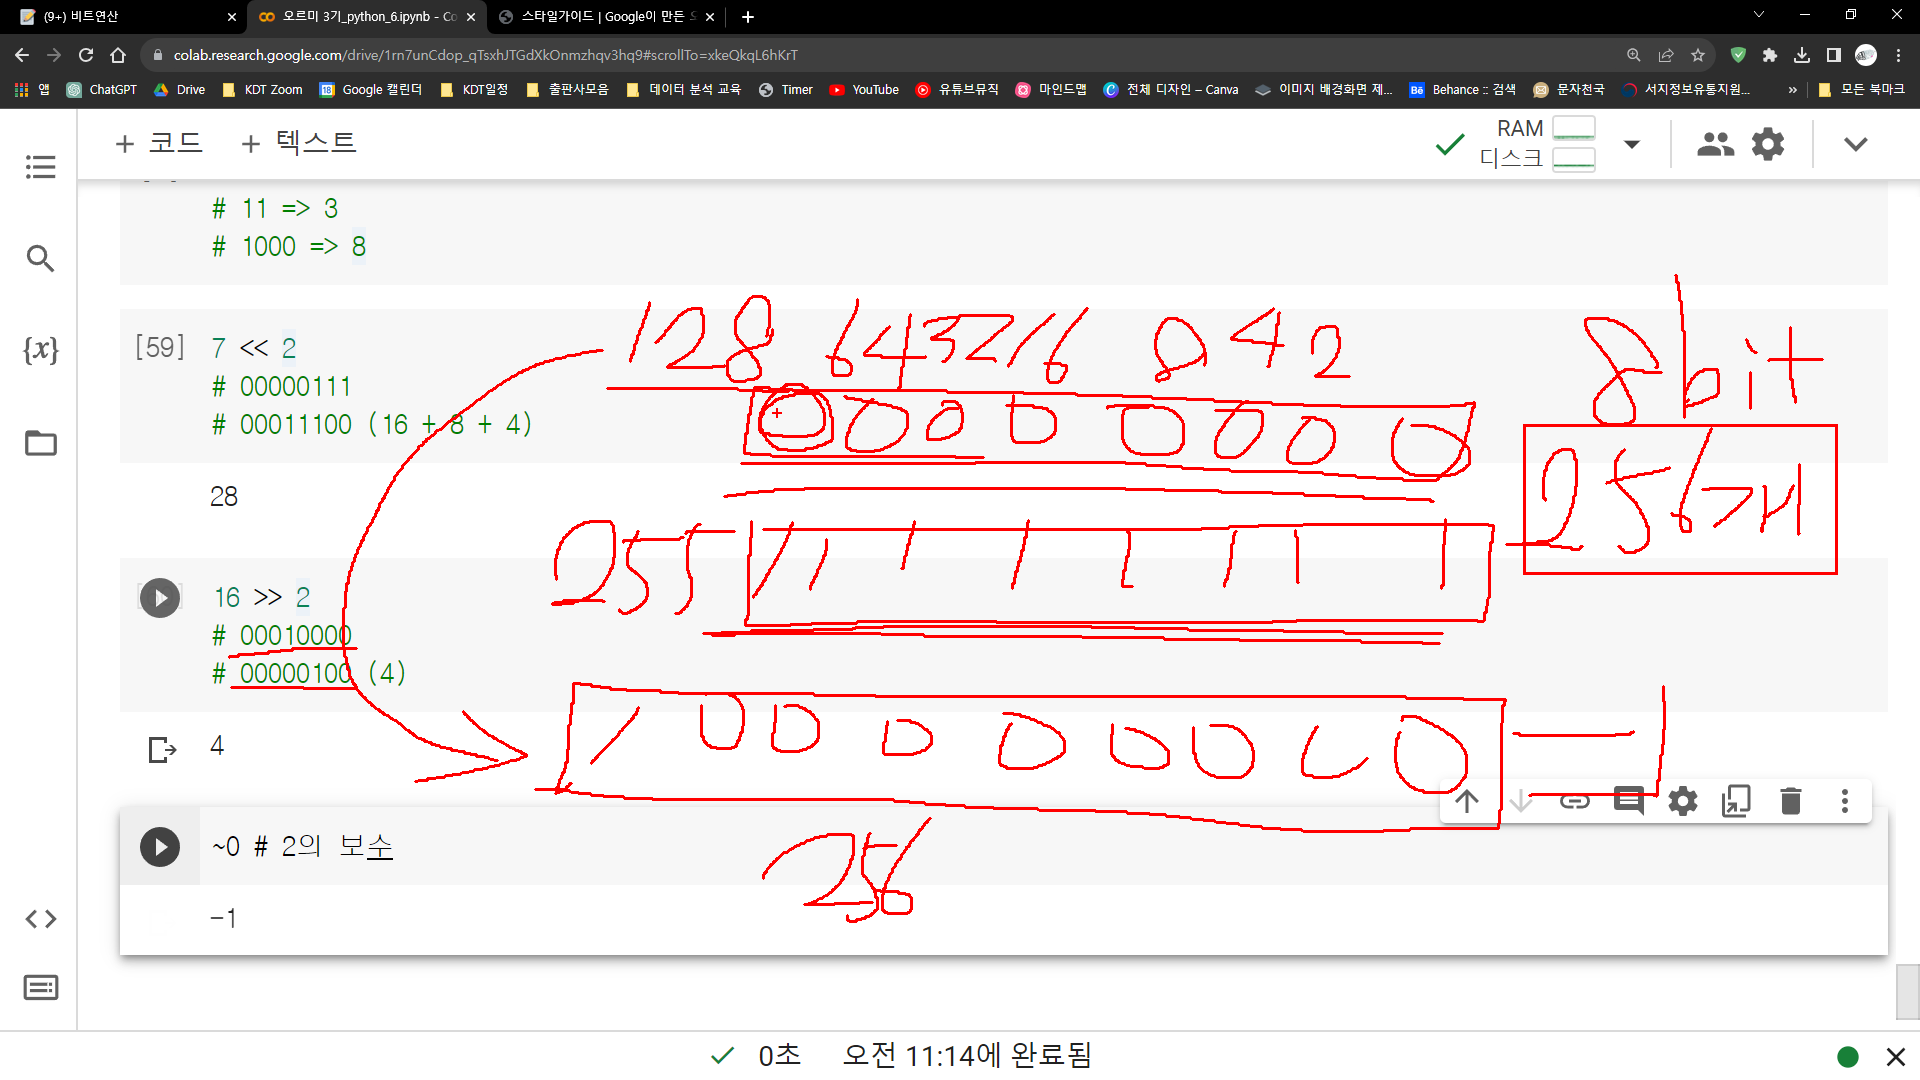

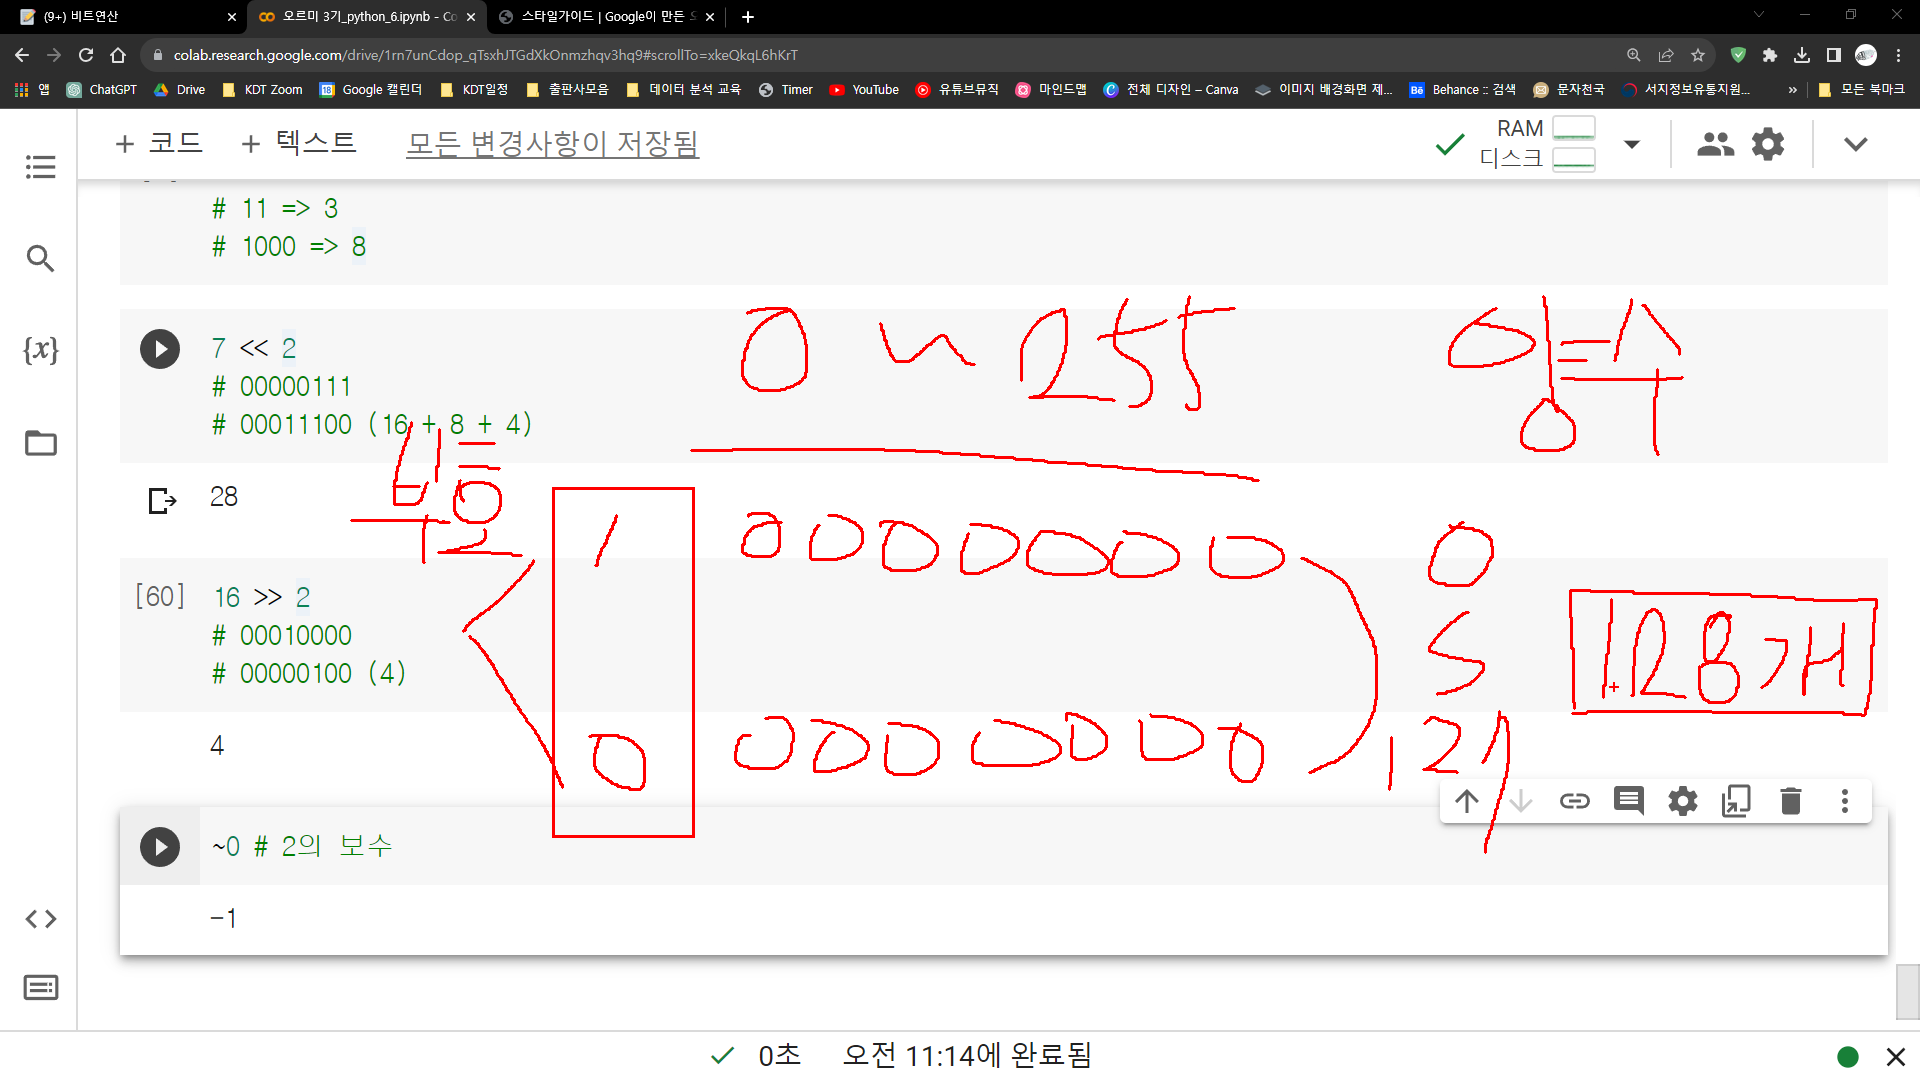

#f-string

In [58]:
# 중괄호가 2개씩 증가할 때마다 출력은 1개씩 증가
value = 'hello'
print(f'{value}') # 중괄호 X
print(f'{{value}}') # 중괄호 1
print(f'{{{value}}}') # 중괄호 1
print(f'{{{{value}}}}') # 중괄호 2
print(f'{{{{{value}}}}}') # 중괄호 2
print(f'{{{{{{value}}}}}}') # 중괄호 3

hello
{value}
{hello}
{{value}}
{{hello}}
{{{value}}}


In [59]:
value = 'hello'
print(f'{10 + 10}') # 중괄호 안에서 연산을 하는 것을 저는 권하지 않습니다.
# print(f'{value + 'world'}') # error
# print(f'{value + \' world\'}') # 이스케이프 문자를 허용하지 않습니다.
print(f'{value + " world"}')
print(f"{value + ' world'}")

20
hello world
hello world


In [60]:
a = 10
b = 20

# case1
two_numbers_mul = a * b # 굳이 변수 1개를 더 생성할 필요가 있을까?
print(f'{two_numbers_mul}')

# case2
print(f'{a * b}') # 간단하니까 이걸로 사용하자!
# 코드가 복잡해지면 가독성에서 차이가 납니다.

200
200


In [62]:
a = 10
b = 20

# case1
two_numbers_mul = a * b # 굳이 변수 1개를 더 생성할 필요가 있을까?
two_numbers_add = a + b
two_numbers_mul_add = two_numbers_mul * two_numbers_add
print(f'{two_numbers_mul_add}') # 이 변수명을 보고 의도를 파악할 수 있습니다.

# case2
print(f'{(a * b) * (a + b)}') # 이 값이 무엇을 의미하는지 모릅니다.
# 코드가 복잡해지면 가독성에서 차이가 납니다.

6000
6000


In [63]:
# 포멧팅 지정자는 {변수이름:포멧팅_양식}
num = 3.14159
print(f"{num:.2f}")  # 출력: 3.14

name = "Alice"
print(f"{name:>10}")  # 출력:      Alice # 포멧팅 지정자, format 용법과 동일

3.14
     Alice


In [64]:
# 파이썬(Python) 3 포맷팅 방식
print('나의 이름은 {}입니다'.format('한사람'))
print('나의 이름은 {0}입니다. 나이는 {1}세이고 성별은 {2}입니다.'.format('한사람',33,'남성'))
print('나이는 {1}세이고 성별은 {2}입니다. 나의 이름은 {0}입니다. '.format('한사람',33,'남성'))
print('나이는 {age}세이고 성별은 {gender}입니다. 나의 이름은 {name}입니다.'.format(name='한사람',age=33,gender='남성'))
print('만세삼창 :  {0}!!! {0}!!! {0}!!! '.format('만세'))
print('삼삼칠 박수 :  {0}!!! {0}!!! {1}!!! '.format('짝'*3,'짝'*7))
print('-' * 40)

print('나의 이름은 {0:.2f}입니다'.format(3.141592))
print('나의 이름은 {0:>20}입니다'.format(3.141592))

나의 이름은 한사람입니다
나의 이름은 한사람입니다. 나이는 33세이고 성별은 남성입니다.
나이는 33세이고 성별은 남성입니다. 나의 이름은 한사람입니다. 
나이는 33세이고 성별은 남성입니다. 나의 이름은 한사람입니다.
만세삼창 :  만세!!! 만세!!! 만세!!! 
삼삼칠 박수 :  짝짝짝!!! 짝짝짝!!! 짝짝짝짝짝짝짝!!! 
----------------------------------------
나의 이름은 3.14입니다
나의 이름은             3.141592입니다


In [65]:
# 파이썬(Python) 3.6 f-string 방식
something = '볼펜'
EA = 2
one_length = 5.343
scale = 'cm'

print(f'{something} {EA}개의 길이는 {one_length*EA}{scale} 입니다.')
print(f'{something} {EA}개의 길이는 {one_length*EA:.1f}{scale} 입니다.')

볼펜 2개의 길이는 10.686cm 입니다.
볼펜 2개의 길이는 10.7cm 입니다.


In [66]:
print('Python is [{:15}]'.format('good')) # 양식 같음, 자료형만 다름
print('Python is [{:<15}]'.format('good'))
print('Python is [{:>15}]'.format('good'))
print('Python is [{:^15}]'.format('good'))
print('Python is [{:-^15}]'.format('good'))
print('당신의 나이는 [{:15}]세'.format(22)) # 양식 같음, 자료형만 다름
print('당신의 나이는 [{:<15}]세'.format(22))
print('당신의 나이는 [{:>15}]세'.format(22))
print('당신의 나이는 [{:^15}]세'.format(22))
print('-' * 40)

Python is [good           ]
Python is [good           ]
Python is [           good]
Python is [     good      ]
Python is [-----good------]
당신의 나이는 [             22]세
당신의 나이는 [22             ]세
당신의 나이는 [             22]세
당신의 나이는 [      22       ]세
----------------------------------------


In [67]:
print('[{:15}]'.format('10')) # 양식 같음, 자료형만 다름
print('[{:15}]'.format(10))   # 양식 같음, 자료형만 다름

[10             ]
[             10]


In [68]:
char_a = '5'
int_a = 5
sample = 1234567890

print(1234567890)
print(f'{sample:>5}') # >는 오른쪽정렬
print(f'{char_a:>5}') # >는 오른쪽정렬
print(f'{char_a:<5}') # <는 왼쪽정렬
print(f'{char_a:^5}') # ^는 가운데정렬
print(f'{int_a:0<5}')# <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음
print(f'{int_a:^10.2f}') # ^ 가운데 정렬하면서 float 타입지정

1234567890
1234567890
    5
5    
  5  
50000
   5.00   


In [69]:
int_a = 5
print(f'{int_a:0<5}') # <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음
print(f'{int_a:0>5}') # <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음

'12345'.zfill(10)

50000
00005


'0000012345'

# 연습문제

In [57]:
# 문제1: 1 ~ 9 까지 더하는 프로그램
# 문제2: 1 ~ 9 까지 홀수의 합
# 문제3: 1000 미만의 자연수에서 3의 배수와 5의 배수의 총합을 구하는 프로그램을 작성

In [62]:
# 문제1: 1 ~ 9 까지 더하는 프로그램
all_sum = sum(range(1, 10))
print(arr)

45


In [1]:
# 문제2: 1 ~ 9 까지 홀수의 합
odd_sum = sum(i for i in range(1, 10, 2))
print(odd_sum)

25


In [6]:
# 문제3: 1000 미만의 자연수에서 3의 배수와 5의 배수의 총합을 구하는 프로그램을 작성
multiple_sum = sum(j for j in range(1, 1000) if j % 3 == 0 or j % 5 == 0)

print(multiple_sum)

233168


In [70]:
# 강사님 풀이

# 문제1: 1 ~ 9 까지 더하는 프로그램
sum(list(range(10))) # list로 형변환 하는 것은 데이터가 클수록 부하가 큽니다.
sum([i for i in range(1, 10)]) # 일반 list로 형변환 하는 것보다는 빠르지만 이것도 역시나 부하가 있습니다.
sum(range(1, 10))
(9 * (1 + 9)) / 2

# 문제2: 1 ~ 9 까지 홀수의 합
sum([i for i in range(1, 10, 2)])
sum([i for i in range(10) if i % 2 == 1])
sum(filter(lambda x:x%2==1, range(10)))
sum(range(1, 10, 2))
s = 0
for i in range(10):
    if i % 2 == 1:
        s += i

# 문제3: 1000 미만의 자연수에서 3의 배수와 5의 배수의 총합을 구하는 프로그램을 작성
sum(range(0, 1000, 3)) + sum(range(0, 1000, 5)) - sum(range(0, 1000, 15))
s = 0
for i in range(1000):
    if i % 3 == 0 or i % 5 == 0:
        s += i
s

233168

In [71]:
# 문제4: 아래 메트릭스를 모두 더해주세요.
m = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# sum(m)
sum(sum(m, []))

45

In [75]:
# 공식

sum([1, 2, 3], 100)
sum([[1, 2, 3], [4, 5, 6], [7, 8, 9]], [])
# [1, 2, 3] + [] == [1, 2, 3]
# [4, 5, 6] + [1, 2, 3] == [4, 5, 6, 1, 2, 3]
# [7, 8, 9] + [4, 5, 6, 1, 2, 3] == [7, 8, 9, 4, 5, 6, 1, 2, 3]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
import numpy as np
# 수학 수식에 막강한 성능을 자랑합니다.
# 수학 수식 관련해서 파이썬보다 속도도 훨~~~~씬 빠르고 기능도 많아요.

np.sum([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

45

In [74]:
# 문제5: 자주 나오는 알파벳과 알파벳 갯수를 많이 나오는 순서대로 출력하세요.
import collections

s = "Hello, World! This is a sample string for testing purposes."
# 방법1
# s = s.replace(',', '').replace('!', '').replace('.', '').replace(' ', '')

# 방법2
# table = str.maketrans(',!.', '   ')
# s = s.translate(table).replace(' ', '')

# 방법3
table = str.maketrans('', '', ',!. ')
s = s.translate(table)

c = collections.Counter(s)
c.most_common

<bound method Counter.most_common of Counter({'s': 7, 'e': 4, 'l': 4, 'o': 4, 'r': 4, 'i': 4, 'p': 3, 't': 3, 'a': 2, 'n': 2, 'g': 2, 'H': 1, 'W': 1, 'd': 1, 'T': 1, 'h': 1, 'm': 1, 'f': 1, 'u': 1})>

In [76]:
d = {}
s = "Hello, World! This is a sample string for testing purposes."
s = s.replace(',', '').replace('!', '').replace('.', '').replace(' ', '')

# 풀이1, 순회를 돌면서 dict에 있으면 += 1, 없으면 =1 대입하면서 푼다
for i in s:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1
d

# 풀이2, set으로 만들어서 count를 한다.
s = "Hello, World! This is a sample string for testing purposes."
for i in set(s):
    d[i] = s.count(i)
d

{'H': 1,
 'e': 4,
 'l': 4,
 'o': 4,
 'W': 1,
 'r': 4,
 'd': 1,
 'T': 1,
 'h': 1,
 'i': 4,
 's': 7,
 'a': 2,
 'm': 1,
 'p': 3,
 't': 3,
 'n': 2,
 'g': 2,
 'f': 1,
 'u': 1,
 '!': 1,
 ',': 1,
 '.': 1,
 ' ': 9}

In [77]:
#문제6 트리만들기

for i in range(1, 10):
    print('*' * (2 * i - 1))

*
***
*****
*******
*********
***********
*************
***************
*****************


In [19]:
# 문제6 트리만들기
for i in range(1, 10):
    print((' ' * (10 - i + 1)) + ('*' * (2 * i - 1)))



#         *
#        ***
#       *****
#      *******
#     *********
#    ***********
#   *************
#  ***************
# *****************

          *
         ***
        *****
       *******
      *********
     ***********
    *************
   ***************
  *****************


In [20]:
for i in range(1, 10):
    print(f"{' ' * (10 - i + 1)}{'*' * ((2 * i) - 1)}")

          *
         ***
        *****
       *******
      *********
     ***********
    *************
   ***************
  *****************


In [21]:
data = 18
for i in range(1, 10):
    print(f"{'*' * ((2 * i) - 1):^{data}}")

        *         
       ***        
      *****       
     *******      
    *********     
   ***********    
  *************   
 ***************  
***************** 


In [22]:
# 다음 자료구조 클래스를 만들어주세요.
# 데이터는 <1, 2, 3, 4> 형식으로 숫자만 저장됩니다.
# print()를 하면 <1, 2, 3, 4>와 같이 출력이 되어야 합니다.
# 메서드는 append, remove가 있습니다.
# 아래 연산은 길이가 다르면 error가 납니다.
# 나누기 연산은 지원하지 않습니다.
# <1, 2, 3, 4> + <1, 2, 3 ,4> == <2, 4, 6, 8>와 같이 같은 순서에 요소를 더합니다.
# <1, 2, 3, 4> - <1, 2, 1 ,2> == <0, 0, 2, 2>와 같이 같은 순서에 요소를 뺍니다.
# <1, 2, 3, 4> * 3 == <3, 6, 9, 12>가 됩니다.

class OperList:
    pass

l = OperList(1, 2, 3, 4)
l.append(5)
print(l + l) # 출력: <2, 4, 6, 8, 10>

TypeError: ignored

In [23]:
class OperList:
    def __init__(self, *args):
        self.data = list(args)

    def append(self, value):
        self.data.append(value)

    def __str__(self):
        return f"<{', '.join(map(str, self.data))}>"

    def __add__(self, other):
        if len(self.data) != len(other.data):
            raise ValueError("두 리스트의 길이가 다릅니다.")
        result = [x + y for x, y in zip(self.data, other.data)]
        return OperList(*result)

    def __sub__(self, other):
        if len(self.data) != len(other.data):
            raise ValueError("두 리스트의 길이가 다릅니다.")
        result = [x - y for x, y in zip(self.data, other.data)]
        return OperList(*result)

    def __mul__(self, factor):
        result = [x * factor for x in self.data]
        return OperList(*result)

# 테스트
l = OperList(1, 2, 3, 4)
l.append(5)
print(l + l)  # 출력: <2, 4, 6, 8, 10>


<2, 4, 6, 8, 10>


In [24]:
class OperList:
    def __init__(self, *args):
        self.__operlist = list(args)

    def __str__(self):
        return f'<{str(self.__operlist)[1:-1]}>'

    def __repr__(self):
        return f'<{str(self.__operlist)[1:-1]}>'

l = OperList(1, 2, 3, 4)
l
# l.append(5)
# print(l + l) # 출력: <2, 4, 6, 8, 10>

<1, 2, 3, 4>

In [50]:
class OperList:
    def __init__(self, *args):
        self.__operlist = list(args)

    def __str__(self):
        return f'<{str(self.__operlist)[1:-1]}>'

    def __repr__(self):
        return f'<{str(self.__operlist)[1:-1]}>'

    def __len__(self):
        return self.__operlist.__len__()

    def __add__(self, other):
        if len(self.__operlist) != len(other.__operlist):
            raise
        for i in range(len(self.__operlist)):
            self.__operlist[i] += other.__operlist[i]
        return f'<{str(self.__operlist)[1:-1]}>'

    def __sub__(self, other):
        if len(self.__operlist) != len(other.__operlist):
            raise
        for i in range(len(self.__operlist)):
            self.__operlist[i] -= other.__operlist[i]
        return f'<{str(self.__operlist)[1:-1]}>'

    def __mul__(self, other):
        if not isinstance(other, int):
            raise
        for i in range(len(self.__operlist)):
            self.__operlist[i] *= other
        return f'<{str(self.__operlist)[1:-1]}>'

    def append(self, data):
        self.__operlist.append(data)

    def remove(self, data):
        self.__operlist.remove(data)


l = OperList(1, 2, 3, 4, 5)
ll = OperList(3, 4, 6, 7)
print(l + l)
print(ll * 2) # 출력: <2, 4, 6, 8, 10>

<2, 4, 6, 8, 10>
<6, 8, 12, 14>


In [52]:
# 과제1:
# 마지막 문제 손코딩(만약 여유가 되시면 좀 더 고도화 한 다음 손코딩 해주세요.)

# 과제2:
# student.csv에는 아래와 같은 텍스트가 담겨있습니다.
'''
학년,반,번,이름,국어,영어,수학,사회
3,3,1,licat,90,80,30,40
3,3,2,mura,80,70,60,30
3,3,3,binky,30,80,70,30
'''
# 학생들의 평균을 구해 아래와 같이 student.csv출력되게 해주세요.(xx이라 표기된 곳에 평균 값이 들어가야 합니다.)
'''
학년,반,번,이름,국어,영어,수학,사회,평균
3,3,1,licat,90,80,30,40,xx
3,3,2,mura,80,70,60,30,xx
3,3,3,binky,30,80,70,30,xx
'''

'\n학년,반,번,이름,국어,영어,수학,사회,평균\n3,3,1,licat,90,80,30,40,xx\n3,3,2,mura,80,70,60,30,xx\n3,3,3,binky,30,80,70,30,xx\n'

In [1]:
f = open('student.csv', 'w')
s = '''학년,반,번,이름,국어,영어,수학,사회
3,3,1,licat,90,80,30,40
3,3,2,mura,80,70,60,30
3,3,3,binky,30,80,70,30
'''
f.write(s)
f.close()

In [2]:
# 강사님 풀이

s = ''
with open('student.csv', 'r') as f:
    lines = f.readlines()
    s += lines[0][:-1] + ',평균'
    for i in lines[1:]:
        data = i.split(',')
        s += f'\n{i.strip()},{sum(map(int, data[4:])) / 4}'

with open('student.csv', 'w') as f:
    f.write(s)
    f.close

In [2]:
f = open('student.csv', 'r')
lines = f.readlines()
average = f'{lines[0][:-1]},평균\n'

for line in lines:
    line = line[:-1]
    try:
        line += f",{sum(map(int, line.split(',')[4:])) / 4}\n"
        average += line
    except:
        continue

f.close()

f = open('student.csv', 'w')
f.write(average)
f.close()